In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Make sure to copy the kaggle.json to c:\users\achut\.kaggle folder and test import kaggle package to test its working after copying
import kaggle

In [3]:
# import KaggleApi and authenticate
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [4]:
### Download the files from 'https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data' makes sure to copy the file name given in the URL i.e. "house-prices-advanced-regression-techniques" 

api.competition_download_file('house-prices-advanced-regression-techniques', 'test.csv', path='./')
api.competition_download_file('house-prices-advanced-regression-techniques', 'train.csv', path='./')
api.competition_download_file('house-prices-advanced-regression-techniques', 'data_description.txt', path='./')

100%|███████████████████████████████████████████████████████████████████████████████| 441k/441k [00:00<00:00, 4.77MB/s]

100%|███████████████████████████████████████████████████████████████████████████████| 450k/450k [00:00<00:00, 6.08MB/s]

100%|█████████████████████████████████████████████████████████████████████████████| 13.1k/13.1k [00:00<00:00, 5.74MB/s]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
### read csv using pandas
house = pd.read_csv('./train.csv')

In [7]:
### read first few lines to check the data that tells we have 81 columns and 5 rows.
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
### get more information using info method. This gives basic picture of the data type of the high level info of columns and counts
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
### check if any null values ### there are around 19 columns with null values
pd.options.display.max_rows=None
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
### Make a new dataset with only numeric columns for Machine learing models and drop ID column #####
house_num = house.select_dtypes(include='number')

In [11]:
house_num.drop('Id', axis=1, inplace=True)

C:\Users\achut\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
# Percentage of the columns having null values to see if we can drop if the percentage count is less than 5% of the total
print("Percentage of Null values is {}".format(house_num.isnull().sum() / len(house_num) * 100))

Percentage of Null values is MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000

In [13]:
### Fill data for LotFrontage rest decided to drop NAs. GarageYrBlt is year and decided drop though slightly above 5% benchmark
house_num['LotFrontage'].mean()

70.04995836802665

In [14]:
### replacing null values with mean number ###
house_num.loc[house_num['LotFrontage'].isnull()==True, 'LotFrontage'] = 70.049

C:\Users\achut\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [15]:
### verify if the null values are replaced successfully ###
house_num['LotFrontage'].isnull().sum()

0

In [16]:
### drop rest of the na's
house_num = house_num.dropna()

In [17]:
### Do a final check to make sure no na's are left and data is cleaned
house_num.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

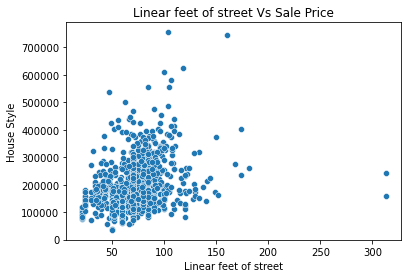

In [18]:
### Linear regression model starts from this Step
### Visualize a scatter plot between single train feature and the target label
g = sns.scatterplot(x="LotFrontage", y="SalePrice", data=house_num)
g.set(title="Linear feet of street Vs Sale Price", xlabel="Linear feet of street", ylabel="House Style")
plt.show()

In [19]:
### Create a train feature as numpy array list
X = house_num["LotFrontage"].values

In [20]:
### generate the target label as numpy array
y = house_num['SalePrice'].values

In [21]:
### reshape the train data list to match the rows with target label
X = X.reshape(-1, 1)

In [22]:
### Now the features are ready for to train a liner regression model on all feature and target values
print(X.shape, y.shape)

(1371, 1) (1371,)


In [23]:
### No need to split the data into training and test sets, target is to assess the relationship between the feature and target values
from sklearn.linear_model import LinearRegression

In [24]:
### instantiate the model
reg = LinearRegression()

In [25]:
### fit the model with train and target labels
reg.fit(X, y)

LinearRegression()

In [26]:
### predict the values
predictions = reg.predict(X)

In [27]:
### print the first 10 rows to have a eye ball check
print(predictions[:10])

[178642.05792654 196307.53045677 182175.15243258 172753.56708313
 201018.32313149 202196.02130018 190419.03961336 184588.25598021
 162154.28356499 160976.58539631]


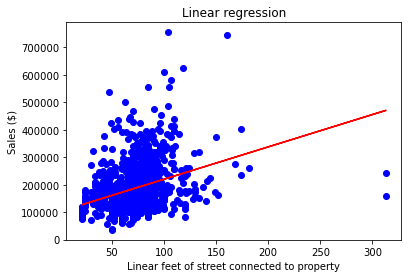

In [28]:
### the model captures a near good linear correlation between the Over all quality and the sales.
plt.scatter(X, y, color = "blue")
plt.plot(X, predictions, color="red")
plt.title("Linear regression")
plt.xlabel("Linear feet of street connected to property")
plt.ylabel("Sales ($)")
####
# Display the plot
plt.show()

In [29]:
### Now will use the full data set to split the train and test list values
from sklearn.model_selection import train_test_split

In [30]:
### drop the target label from the train list
X = house_num.drop("SalePrice", axis=1).values

In [31]:
### generate the target label
y = house_num["SalePrice"].values

In [32]:
### split the data into train and target list with 20% data split and seed with 21
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [33]:
### instantiate the model
reg = LinearRegression()

In [34]:
### fit the model with train and test values
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
### predict the test labels
y_pred = reg.predict(X_test)

In [36]:
### use regex in print satement:
### The first three predictions seems to be within around 5 to 8 % of the actual values from the data set
print("Predictions: {}, Actual Values: {}".format(y_pred[:3], y_test[:3]))

Predictions: [162176.69625317 221734.25063176 198677.68975754], Actual Values: [175000 176000 166000]


In [37]:
### Evaluating the model performance by generating score using R squared
from sklearn.metrics import mean_squared_error

In [38]:
# Compute R-squared
r_squared = reg.score(X_test, y_test)

In [39]:
# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [40]:
# Print the metrics ### The features explain 86 % of the variance in the SalePrice
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.865456125790946
RMSE: 25755.667728207958


In [41]:
### using cross validation model
from sklearn.model_selection import cross_val_score, KFold

In [42]:
# Create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=4)

In [43]:
# Compute 5-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

In [44]:
# Print scores 
### R squared for each fold ranged between 0.61 and 0.86
print(cv_scores)

[0.76196596 0.81282636 0.83663473 0.61717034 0.868795  ]


In [45]:
### Analysing CV scores
### This give average score of 0.77 with a lower standard deviation of 0.08
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.7794784798381912
0.08832551247286391
[0.6316499  0.86557898]


In [47]:
### Using ridge regression model to find the alpha parameter values - Regularised techniques ###
from sklearn.linear_model import Ridge

In [48]:
### set series of alpha values in testing
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

In [49]:
### create a empty list to hold the scores for different alpha values
ridge_scores = []

In [50]:
### Iterate to capture the scores for the list of alpha values
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)

In [51]:
### the scores seems to be changing with increasing alpha no any absrupt / major shifts
print(ridge_scores)

[0.8655007450146194, 0.865887363435203, 0.8687500590202105, 0.8770076209126352, 0.8646483028401892, 0.8267719370259012]


In [52]:
### Using lasso model to identify the important features influencing the target label
from sklearn.linear_model import Lasso

In [53]:
### instantiate lasso with alpha = 0.3
lasso = Lasso(alpha=0.3)

In [54]:
### fit the model
lasso.fit(X, y)

Lasso(alpha=0.3)

In [55]:
# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_

In [56]:
### print results
print(lasso_coef)

[-1.91734774e+02 -9.29521599e+01  4.31940541e-01  1.82712276e+04
  5.32772407e+03  3.67015313e+02  1.19693012e+02  2.85751997e+01
  1.52365504e+01  5.87662123e+00  4.45811721e+00  2.90585743e+00
  4.19519219e+01  4.35772047e+01  2.64099245e+01  5.97563591e+00
  8.09592051e+03  1.65799628e+03  2.12933771e+03 -3.55005764e+03
 -9.96139508e+03 -2.06009586e+04  5.31401291e+03  3.56124485e+03
 -5.94139009e+01  1.58847117e+04  5.69181555e+00  2.29094154e+01
 -4.41761811e+00  1.04850852e+01  2.22861933e+01  5.47635062e+01
 -2.78714089e+01 -7.23195884e-01 -8.66026842e+01 -6.31303087e+02]


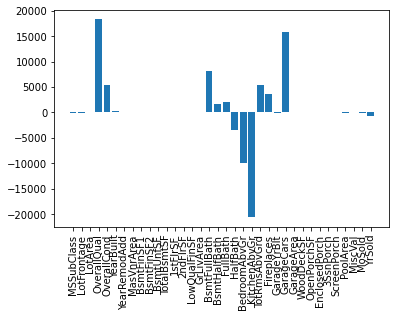

In [59]:
### Overall Quality and Garage Cars are the most important features for the prediction of the SalePrice
house_names = house_num.drop("SalePrice", axis=1).columns
plt.bar(house_names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [60]:
### Evaluating Hyperparameter with GridsearchCV
from sklearn.model_selection import GridSearchCV

In [61]:
# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

In [62]:
# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

In [63]:
# Fit to the training data
lasso_cv.fit(X_train, y_train)

C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61551716343.46643, tolerance: 576110315.6284422
  model = cd_fast.enet_coordinate_descent(
C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57794815673.874756, tolerance: 601443262.685242
  model = cd_fast.enet_coordinate_descent(
C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60631345345.03784, tolerance: 575274619.7455064
  model = cd_fast.enet_coordinate_descent(
C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60656891155.32703, tolerance: 575274619.7455064
  model = cd_fast.enet_coordinate_descent(
C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61582587534.44702, tolerance: 576110315.6284422
  model = cd_fast.enet_coordinate_descent(
C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57801377043.04846, tolerance: 601443262.685242
  model = cd_fast.enet_coordinate_descent(
C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(alpha=0.3),
             param_grid={'alpha': array([1.00000000e-05, 5.26410526e-02, 1.05272105e-01, 1.57903158e-01,
       2.10534211e-01, 2.63165263e-01, 3.15796316e-01, 3.68427368e-01,
       4.21058421e-01, 4.73689474e-01, 5.26320526e-01, 5.78951579e-01,
       6.31582632e-01, 6.84213684e-01, 7.36844737e-01, 7.89475789e-01,
       8.42106842e-01, 8.94737895e-01, 9.47368947e-01, 1.00000000e+00])})

In [64]:
### with alpha value 1 we got R squared score of 0.73 not bad though
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1.0}
Tuned lasso score: 0.73513017555268


In [65]:
### scaling the train and test labels using scaler method
from sklearn.preprocessing import StandardScaler

In [66]:
# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

In [67]:
#Instantiate the pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.5))])

In [68]:
# Calculate and print R-squared
### By scaling method we have achieved 0.86 score better than features without scaling
print(pipeline.score(X_test, y_test))

0.8654720147330712


In [69]:
### Finally trying to understand which model suits best for this business scenario
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}

In [70]:
### empty list creation
results = []

In [71]:
# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66086073992.33423, tolerance: 587039385.9164237
  model = cd_fast.enet_coordinate_descent(
C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60693080520.9104, tolerance: 621529642.6168611
  model = cd_fast.enet_coordinate_descent(
C:\Users\achut\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72344838117.28833, tolerance: 632487949.6971527
  model = cd_fast.enet_coordinate_descent(


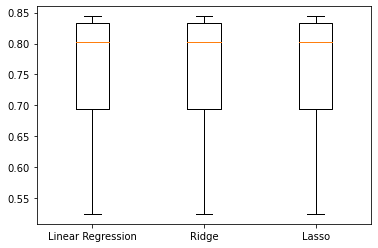

In [72]:
# Create a box plot of the results
### It seems the median is same for all the three models in this case no big diff
plt.boxplot(results, labels=models.keys())
plt.show()